# Exploratory Data Analysis
_Locked Up_ - Bridget Weill - Fairfield University - MSBA: Capstone Project

------------------

## Import Packages

In [1]:
# data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import boxcox
from scipy import stats

## Import Data

In [2]:
import pandas as pd
data=pd.read_excel('Prison.xlsx')

In [3]:
data.head(3)

,Sex,Age,Race,US Citizenship,Marital Status,Education,Monthly income before arrest (in dollars),Current Offense,Current Offense Type,Criminal history,...,Used hallucinogens,Used marijuana or hashish,Used other drugs,Used inhalants to get high,Used a needle to inject drugs,Ever regularly drank alcohol?,Felt you should cut down on drinking,Annoyed by drinking criticism,Guilty about drinking,Needed drink first think in the morning
0,Female,42,Black non-Hispanic,Not a US Citizen,Married,Twelfth grade,1-199,Stolen Property,Property,No,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
1,Female,53,Black non-Hispanic,Not a US Citizen,Seperated (not because of prison),Seventh grade,NaN,Drug Trafficking,Drug,No,...,No,No,No,No,No,No,NaN,NaN,NaN,NaN
2,Female,33,Hispanic,Not a US Citizen,Seperated (not because of prison),Twelfth grade,600-799,Drug Trafficking,Drug,No,...,No,No,No,No,No,No,No,No,No,No


## Descriptive Statistics

In [4]:
data.shape

(3474, 65)

- 3474 rows and 65 columns

In [5]:
data.describe()

,Age,Prior incarcerations as juvenile,Prior incarcerations as adult,Total prior incarcerations,Number of minor children (up to 6),Number of adult children (up to 6)
count,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000
mean,37.664364,0.227404,1.012666,1.240069,1.301957,0.693437
std,10.707356,1.183478,2.951837,3.426484,1.465826,1.266016
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,79.000000,31.000000,100.000000,100.000000,6.000000,6.000000


*The count of all of these features are equal and the same as the row count (3474) - there is no data missing*

__Age:__ 
- Minimum age is 19: this dataset does not include any minors
- Maximum age is 79
- Average age is 37.66

__Prior incarcerations as juvenile:__
- Some of these prisoners have never been incarcerated as a juvenile before (minimum value is 0)
- Most amount of times one of the prisoners being surveyed has been to juvy is 31!
- The average number of juvenile incarcerations is below 0 (.227404), so most of these prisoners have not been to juvy

__Prior incarcerations as adult:__
- Some of these prisoners have never been incarcerated as an adult before (minimum value is 0)
- Average prior adult incarcerations is a little over 1 (1.012666)... does this mean the majority of these prisoners have been imprisoned as an adult before?

__Total prior incarcerations:__
- For some prisoners, this is their first time ever being incarcerated (minimum value is 0)
- Average total prior incarcerations is above 1 (1.24)... once again, does this mean the majority of these prisoners have been imprisoned before at least once in their lives?
- *__Noteworthy find to look back into__: Prior incarcerations as adult and Total prior incarcerations have a max of 100, possible error?*

__Minor children (up to 6):__
- Most prisoners have a minor child: average number of minor children is 1.301957
- Some prisoners have no minor children (minimum value is 0)
- Most amount of minor children a prisoner has is 6 (maximum value is 6) *Max for the survey was 6, so some prisoners may have over 6 minor children*

__Adult children (up to 6):__
- Most prisoners do not have an adult child: average number of adult children is 0.6934
- Some prisoners have no adult children (minimum value is 0)
- Most amount of adult children a prisoner has is 6 (maximum value is 6) *Max for the survey was 6, so some prisoners may have over 6 adult children*

In [6]:
data.median()

Age                                   36.0
Prior incarcerations as juvenile       0.0
Prior incarcerations as adult          0.0
Total prior incarcerations             0.0
Number of minor children (up to 6)     1.0
Number of adult children (up to 6)     0.0
dtype: float64

## Drop the features that are not needed for machine learning

- Not all of these features will be used for machine learning, the model will focus on the most important categories and leave the smaller details out for further analysis after the model is run

In [7]:
data = data.drop(['Prior incarcerations as juvenile', 'Prior incarcerations as adult','Total prior incarcerations', 'Mental health treatment since admission',
       'Perscription for mental health since admission','Mental hospital since admission','Sentence included drug or alcohol treatment',
       'Sentence included sex offender treatment','Number of minor children (up to 6)','Number of adult children (up to 6)', 
       'Incarcerated drug or alcohol treatment','Probation or Parole drug or alcohol treatment', 'Used heroin',
       'Used opiates other than heroin', 'Used methamphetamine','Used amphetamine', 'Used methaqualone',
       'Used barbiturates without prescription','Used tranquilizers without prescription', 'Used crack',
       'Used cocaine other than crack', 'Used PCP', 'Used hallucinogens','Used marijuana or hashish', 'Used other drugs',
       'Used inhalants to get high', 'Used a needle to inject drugs','Felt you should cut down on drinking',
       'Annoyed by drinking criticism', 'Guilty about drinking','Needed drink first think in the morning',
       'Age of abuse','Age of perpetrator when abused','SexualAbuse_Type of rape','SexualAbuse_Perpetrator'
        ,'SexualAbuse_How Many','PhysicalAbuse_Perpetrator','PhysicalAbuse_How Many',
        'Current Offense Type'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3474 entries, 0 to 3473
Data columns (total 26 columns):
Sex                                          3474 non-null object
Age                                          3474 non-null int64
Race                                         3474 non-null object
US Citizenship                               3474 non-null object
Marital Status                               3474 non-null object
Education                                    3474 non-null object
Monthly income before arrest (in dollars)    2855 non-null object
Current Offense                              3474 non-null object
Criminal history                             3474 non-null object
Crime for drug money?                        3474 non-null object
Sex offender                                 3474 non-null object
Status at arrest                             3474 non-null object
Weapon (Most Dangerous)                      3474 non-null object
Secondary Weapon                    

#### __More Info:__
- There are a few missing data values in the dataset, this is seen through the varying column value totals
- There is only one column with a datatype that varies from the rest:
    - int64: 1 column
        - Age
    - object: 25 columns
- There are 26 columns

In [9]:
data.shape

(3474, 26)

- With all the unneeded values removes, the dataset is now 3474 rows and 26 columns

## Binning

- Through binning, the number of features being put into the machine learning model is decreased, making it easier to handle and analyze.
- As seen below, a bin for for education level will be made, as well as a bin for income levels in order to compute missing values
    - Income levels bin will be groupby in order to impute the missing values
    - It will then be converted back into the range values

__Education Bin:__
- Bins represent level of education rather than grade

| Education Level Completed | Season | 
| ------------ | ---------- | 
| No Schooling | No school or only attended Kindergarten |
| Another Country | Attended school in other country/grades not comparable |
| Some Elementary School | Have not completed 1st - 5th grade |
| Completed Elementary School | Completed Elementary School (1st-5th grade) |
| Some Middle School | Have not completed 6th - 8th grade |
| Completed Middle School | Completed Middle School (6th-8th grade) |
| Some High School | Have not completed 9th - 12th grade |
| Graduated High School | Obtained a High School Degree |
| Some College | Completed some years of college |
| Graduated College | Obtained a college degree |
| Some Graduate School | Completed some years of graduate school |

In [10]:
# Education has a space after it (code below did not work until fixed)
data = data.rename(columns={'Education ':'Education'})

In [11]:
def schooling(Education):
     if Education == 'Never attended or attended kindergarten only':                          
        return('No Schooling')
     if Education == 'First grade':                          
        return('Some Elementary School')
     if Education == 'Second grade':                          
        return('Some Elementary School')
     if Education == 'Third grade':                          
        return('Some Elementary School')
     if Education == 'Fourth grade':                         
        return('Some Elementary School')
     if Education == 'Fifth grade':                          
        return('Completed Elementary School')
     if Education == 'Sixth grade':                          
        return('Some Middle School')
     if Education == 'Seventh grade':                          
        return('Some Middle School')
     if Education == 'Eighth grade':                          
        return('Completed Middle School')
     if Education == 'Ninth grade':                          
        return('Some High School')
     if Education == 'Tenth grade':                          
        return('Some High School')
     if Education == 'Eleventh grade':                          
        return('Some High School')
     if Education == 'Twelfth grade':                          
        return('Graduated High School')
     if Education == 'College freshman':                          
        return('Some College')
     if Education == 'College sophomore':                          
        return('Some College')
     if Education == 'College junior':                          
        return('Some College')
     if Education == 'College senior':                          
        return('Graduated College')
     if Education == 'Graduate school one year':                          
        return('Some Graduate School')
     if Education == 'Graduate school two or more years':                          
        return('Some Graduate School')
     if Education == 'Attended school in other country/grades not comparable':                          
        return('Another Country')

# Create a new column EduLevel in the dataframe
data['EduLevel'] = data['Education'].apply(schooling)

__Income Bin:__
- In order to fill the NaN values, income cannot be in a range
- For better evaluation purposes, income is converted into a value
 
| Income Bin | Monthly Income Range | 
| ------------ | ---------- | 
| 0 | No Income |
| 1 | 1-199 |
| 2 | 200-399 |
| 3 | 400-599 |
| 4 | 600-799 |
| 5 | 800-999 |
| 6 | 1000-1199 |
| 7 | 1200-1499 |
| 8 | 1500-1999 |
| 9 | 2000-2499 |
| 10 | 2500-4999 |
| 11 | 5000-7499 |
| 12 | 7500 or more |

In [12]:
# Convert NaN to 'Blank' so they do not convert to None
data['Monthly income before arrest (in dollars)'] = data['Monthly income before arrest (in dollars)'].fillna('Blank')

In [13]:
def incomes(Monthly):
     if Monthly == 'Blank':                          
        return('Missing')
     if Monthly == 'No income':                          
        return(0)
     if Monthly == '1-199':                          
        return(1)
     if Monthly == '200-399':                          
        return(2)
     if Monthly == '400-599':                          
        return(3)
     if Monthly == '600-799':                         
        return(4)
     if Monthly == '800-999':                          
        return(5)
     if Monthly == '1000-1199':                          
        return(6)
     if Monthly == '1200-1499':                          
        return(7)
     if Monthly == '1500-1999':                          
        return(8)
     if Monthly == '2000-2499':                          
        return(9)
     if Monthly == '2500-4999':                          
        return(10)
     if Monthly == '5000-7499':                          
        return(11)
     if Monthly == '7500 or more':                          
        return(12)

# Create a new column IncomeBin in the dataframe
data['IncomeBin'] = data['Monthly income before arrest (in dollars)'].apply(incomes)
data['IncomeBin'].replace('Missing', np.nan, inplace=True)
data.head(2)

,Sex,Age,Race,US Citizenship,Marital Status,Education,Monthly income before arrest (in dollars),Current Offense,Criminal history,Crime for drug money?,...,Mother been incarcerated?,Father been incarcerated?,Spouse been incarcerated?,Child been incarcerated?,Brother been incarcerated?,Sister been incarcerated?,Ever used any illegal drugs?,Ever regularly drank alcohol?,EduLevel,IncomeBin
0,Female,42,Black non-Hispanic,Not a US Citizen,Married,Twelfth grade,1-199,Stolen Property,No,No,...,No,No,No,No,No,No,No,No,Graduated High School,1.0
1,Female,53,Black non-Hispanic,Not a US Citizen,Seperated (not because of prison),Seventh grade,Blank,Drug Trafficking,No,No,...,No,No,No,No,No,No,No,No,Some Middle School,NaN


In [14]:
# Drop imputed values original columns
data = data.drop(['Education','Monthly income before arrest (in dollars)'], axis=1)

## Missing values

In [15]:
data.isna().sum()

Sex                                    0
Age                                    0
Race                                   0
US Citizenship                         0
Marital Status                         0
Current Offense                        0
Criminal history                       0
Crime for drug money?                  0
Sex offender                           0
Status at arrest                       0
Weapon (Most Dangerous)                0
Secondary Weapon                       0
Has at least one mental disorder       0
Physically or Sexually Abused          0
Children?                              0
Who did you live with growing up?      0
Mother been incarcerated?              7
Father been incarcerated?              7
Spouse been incarcerated?              7
Child been incarcerated?               7
Brother been incarcerated?             7
Sister been incarcerated?              7
Ever used any illegal drugs?           0
Ever regularly drank alcohol?          0
EduLevel        

- __7 Missing values:__ 'Mother been incarcerated?', 'Father been incarcerated?', 'Spouse been incarcerated?', 'Child been incarcerated?', 'Brother been incarcerated?', & 'Sister been incarcerated? 
- __619 Missing values:__ IncomeBin

#### __Imputing Missing Values:__
- For the __incarceration columns__ each missing 7 values, it will be assumed that a missing value is a 'No' response.
    - Replace NaN with "No"

In [16]:
data["Mother been incarcerated?"].fillna("No", inplace = True)
data["Father been incarcerated?"].fillna("No", inplace = True)
data["Spouse been incarcerated?"].fillna("No", inplace = True)
data["Child been incarcerated?"].fillna("No", inplace = True)
data["Brother been incarcerated?"].fillna("No", inplace = True)
data["Sister been incarcerated?"].fillna("No", inplace = True)

- __Income__ will be imputed in comparison to Sex and Education Level
- Since income can vary greatly among individuals, it did not seem correct to base income off of an overall median or average income
    - Instead, by grouping the dataset by Sex, and then further by Education Level, the median IncomeBin per group was used to fill the missing IncomeBin values in the dataset

In [17]:
Incomes = data.groupby(['Sex','EduLevel'])
Incomes.median()

Age   IncomeBin
Sex    EduLevel                                    
Female Another Country              49.0        NaN
       Completed Elementary School  39.5        3.0
       Completed Middle School      33.0        5.0
       Graduated College            42.0       10.0
       Graduated High School        38.0        6.0
       No Schooling                 26.0        6.0
       Some College                 37.0        8.0
       Some Elementary School       49.0        5.5
       Some Graduate School         44.0        9.0
       Some High School             33.0        6.0
       Some Middle School           36.5        3.0
Male   Another Country              39.0        6.5
       Completed Elementary School  43.0        7.0
       Completed Middle School      36.0        7.0
       Graduated College            44.0       10.0
       Graduated High School        36.0        8.0
       No Schooling                 40.5        9.0
       Some College                 38.0        8.0
       Some Elementary School       40.5        5.5
       Some Graduate School         46.0       11.0
       Some High School             33.0        7.0
       Some Middle School           37.0        6.0

In [18]:
data['IncomeBin'] = data.groupby(['Sex','EduLevel'], sort=False)['IncomeBin'].apply(lambda x: x.fillna(x.median()))

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


- There is still 1 missing value:
    - As seen in the table above, a female with an education level in another country does not have a median value
    - This 1 missing value is dropped

In [19]:
data['IncomeBin'].isna().sum()

1

In [20]:
data['IncomeBin'].dropna(inplace = True)

In [21]:
def income_range(Bin):
     if Bin == 0:                          
        return('No income')
     if Bin == 1:                          
        return('1-199')
     if Bin == 2:                          
        return('200-399')
     if Bin == 3:                          
        return('400-599')
     if Bin == 4:                         
        return('600-799')
     if Bin == 5:                          
        return('800-999')
     if Bin == 6:                          
        return('1000-1199')
     if Bin == 7:                          
        return('1200-1499')
     if Bin == 8:                          
        return('1500-1999')
     if Bin == 9:                          
        return('2000-2499')
     if Bin == 10:                          
        return('2500-4999')
     if Bin == 11:                          
        return('5000-7499')
     if Bin == 12:                          
        return('7500 or more')

# Create a new column IncomeBin in the dataframe
data['IncomeRange'] = data['IncomeBin'].apply(income_range)

In [22]:
data = data.drop(['IncomeBin'], axis=1)

## Create Seperate Dataframes

__Continuous Dataframe:__
- Contains the continuous features
    - Only continuous feature is Age

In [23]:
datacont = data.drop(['Sex','Race', 'US Citizenship', 'Marital Status',
       'Current Offense', 'Crime for drug money?', 'Criminal history',
       'Sex offender', 'Status at arrest', 'Weapon (Most Dangerous)',
       'Secondary Weapon', 'Has at least one mental disorder',
       'Physically or Sexually Abused', 'Children?',
       'Who did you live with growing up?', 'Mother been incarcerated?',
       'Father been incarcerated?', 'Spouse been incarcerated?',
       'Child been incarcerated?', 'Brother been incarcerated?',
       'Sister been incarcerated?', 'Ever used any illegal drugs?',
       'Ever regularly drank alcohol?', 'EduLevel', 'IncomeRange'], axis=1)

__Categorical Dataframe:__
- Contains all of the Categorical features
    - All features except age and criminal history

In [24]:
datacat = data.drop(['Age ', 'Criminal history'], axis=1)

__Target Dataframe:__
- Contains the target feature
    - Criminal History

In [25]:
target = data.drop(['Age ','Sex','Race', 'US Citizenship', 'Marital Status',
       'Current Offense', 'Crime for drug money?',
       'Sex offender', 'Status at arrest', 'Weapon (Most Dangerous)',
       'Secondary Weapon', 'Has at least one mental disorder',
       'Physically or Sexually Abused', 'Children?',
       'Who did you live with growing up?', 'Mother been incarcerated?',
       'Father been incarcerated?', 'Spouse been incarcerated?',
       'Child been incarcerated?', 'Brother been incarcerated?',
       'Sister been incarcerated?', 'Ever used any illegal drugs?',
       'Ever regularly drank alcohol?', 'EduLevel', 'IncomeRange'], axis=1)

## Visualizations:

### *Continuous Data:*

#### __Box Plot:__
- Box plots visualize if there are any outliers in the data, which can alter the results
- Box plots also visualize the range of values in the data
- There is only 1 continuous feature in the dataset
- As seen below, age ranges from 19 to just under 80
- The majority of the age datapoints range between late 20s and mid 40s
- There are a few outliers aged 70 and older
- Since this survey was only done on adults, there is no data on minors (younger than 18)
- The green triangle represents the mean

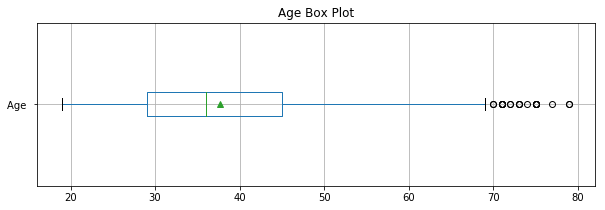

In [26]:
datacont.boxplot(vert=False, figsize=(10,3),showmeans=True)
plt.title('Age Box Plot')
plt.show()

#### __Skewness:__
- Skewness should be in the range of -.5 and .5
- Age is skewed slightly above .5

In [27]:
datacont.skew()

Age     0.645001
dtype: float64

#### __Histogram:__
- Histograms help to visualize the skewness and range of values
- As seen in these histograms, the Age data seems to have a pretty normal skew
- There are not many values that greatly alter the data
- It is also clear the majority of prisoners ages are below 50 and above 20.

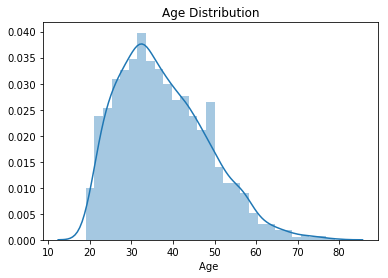

In [28]:
sns.distplot(datacont["Age "])
plt.title("Age Distribution")
plt.show()

### *Categorical Data:*

#### __Bar Graphs:__
- Bar graphs visualize categorical data through the distribution of bins
- Each categorical value is shown in a seperate bar graph below

__*Sex:*__
- The majority of prisoners are males with a count over 2500
- The count of females is below 1000

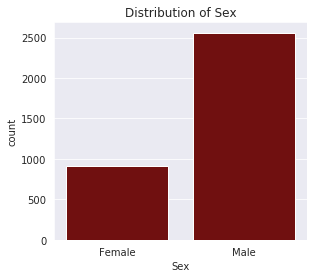

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Sex", data=datacat, color="maroon")
ax.set(title="Distribution of Sex")
plt.show()

__*Race:*__
- The majority of race is between black non-hispanics, followed by white non-hispanics, and then hispanics.
- Highest count is black non-hispanic
- Lowest count is Asian, Pacific Islander, Native Hawaiian non-hispanic

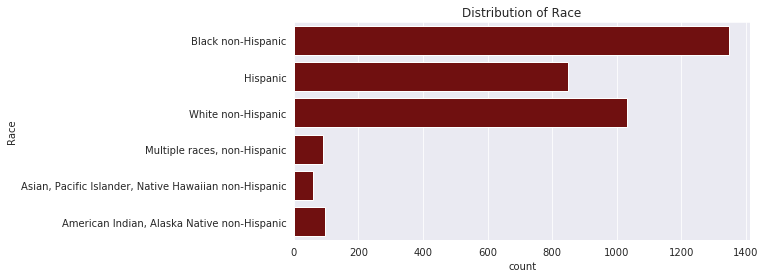

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(y="Race", data=datacat, color="maroon")
ax.set(title="Distribution of Race")
plt.show()

__*US Citizenship:*__
- The majority of prisoners are US Citizens
- Around 500 prisoners are non citizens

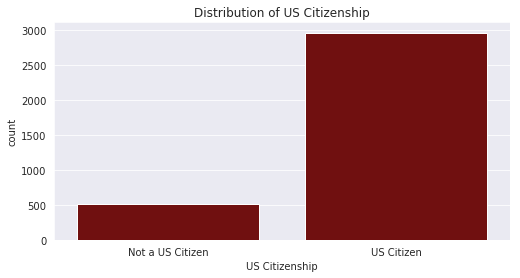

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="US Citizenship", data=datacat, color="maroon")
ax.set(title="Distribution of US Citizenship")
plt.show()

__*Marital Status:*__
- Most prisoners have never been married
- Second largest count is married, followed by divorced

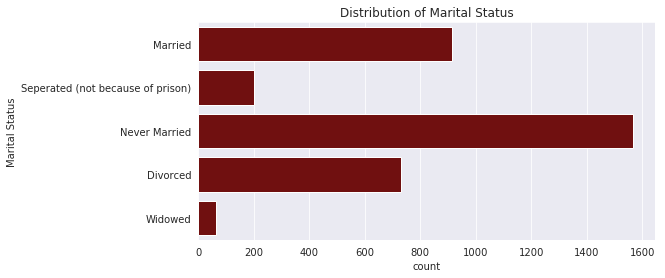

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(y="Marital Status", data=datacat, color="maroon")
ax.set(title="Distribution of Marital Status")
plt.show()

__*Current Offense:*__
- By far, the most common crime is drug trafficking, with a count of almost 1000
- Second behind drug trafficking is Weapon crimes, with a total count of almost 500
- Robbery and fraud are also top values
- The least common crime among these prisoners is traffic violations

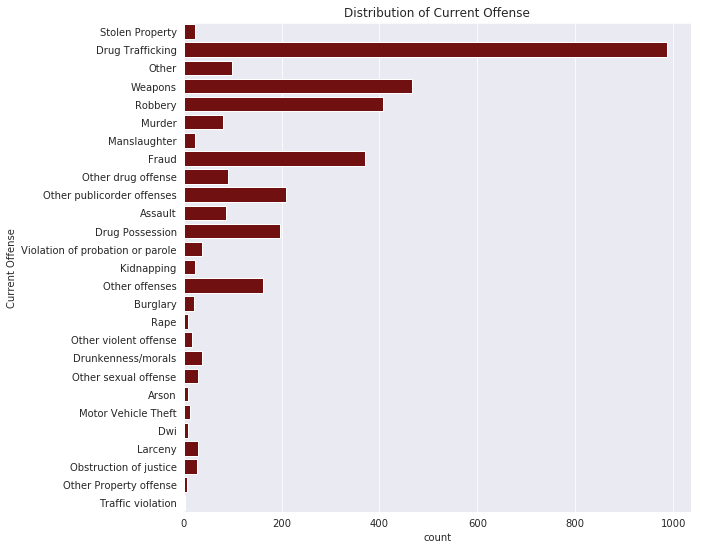

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
ax = sns.countplot(y="Current Offense", data=datacat, color="maroon")
ax.set(title="Distribution of Current Offense")
plt.show()

__*Crime for drug money?:*__
- Most crimes are not committed for drug money (count of almost 3000)
- A little over 500 crimes were comitted for drug money

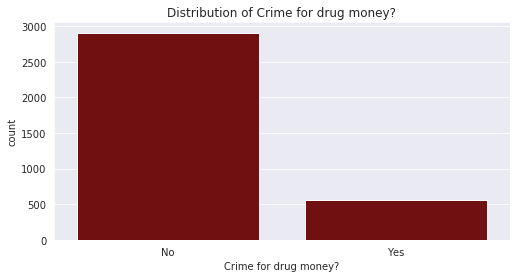

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Crime for drug money?", data=datacat, color="maroon")
ax.set(title="Distribution of Crime for drug money?")
plt.show()

__*Sex offender?:*__
- Almost all of these prisoners are not sex offenders

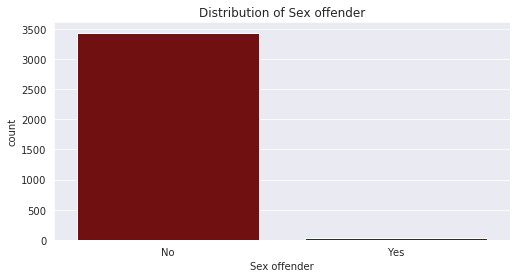

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Sex offender", data=datacat, color="maroon")
ax.set(title="Distribution of Sex offender")
plt.show()

__*Status at arrest?:*__
- Most prisoners are incarcerated under a new court commitment
- Second most common status is around 500 prisoners incarcerated on a probation violation, followed by parole violation with just under 500
- The lowest count was under escape, almost 0

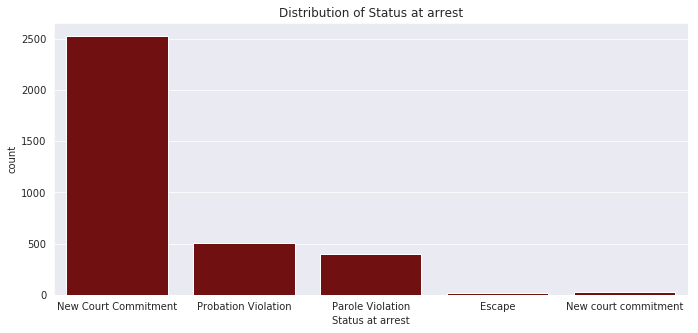

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="Status at arrest", data=datacat, color="maroon")
ax.set(title="Distribution of Status at arrest")
plt.show()

*Mistake Corrected:*
- There are two bars labeled New court commitment, one has captial letters, one does not
- Fix this error through .loc as seen below

In [37]:
indices = [420, 435, 510, 517, 1131, 1152, 1275, 1593, 1601, 1825, 1841, 2033, 2175, 2267, 2334, 2541, 2642, 2666, 2750, 2849, 2924, 3286, 3302, 3384, 3463]
datacat.loc[indices,'Status at arrest'] = 'New Court Commitment'

Rerun the bar graph to be sure the changes were made
- There is now only 1 column for new court commitments

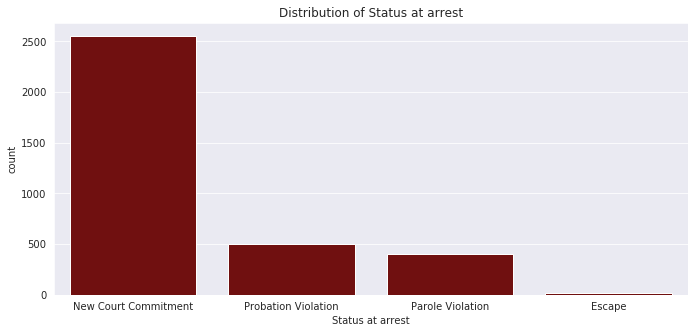

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="Status at arrest", data=datacat, color="maroon")
ax.set(title="Distribution of Status at arrest")
plt.show()

__*Weapon (Most Dangerous):*__
- Most of these prisoners did not use a weapon while committing their crimes
- The weapon with the highest count is Firearms

*Mistake Corrected:*
- The only weapons on the graph should be the 'most dangerous' ones
- Fix this error through binning the grouped weapons into the most dangerout ones

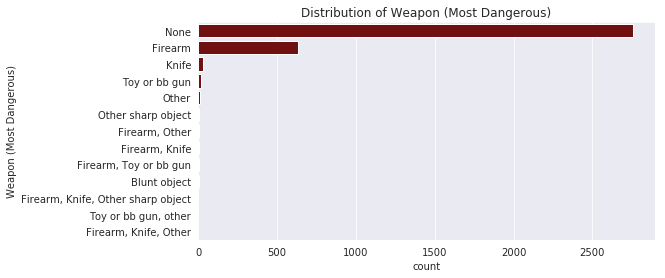

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(y="Weapon (Most Dangerous)", data=datacat, color="maroon")
ax.set(title="Distribution of Weapon (Most Dangerous)")
plt.show()

In [40]:
def weapons(weapon):
     if weapon == 'None':                          
        return('None')
     if weapon == 'Firearm':                          
        return('Firearm')
     if weapon == 'Knife':                          
        return('Knife')
     if weapon == 'Toy or bb gun':                          
        return('Toy or bb gun')
     if weapon == 'Other':                         
        return('Other')
     if weapon == 'Other sharp object':                          
        return('Other sharp object')
     if weapon == 'Firearm, Other':                          
        return('Firearm')
     if weapon == 'Firearm, Knife':                          
        return('Firearm')
     if weapon == 'Firearm, Toy or bb gun':                          
        return('Firearm')
     if weapon == 'Blunt object':                          
        return('Blunt object')
     if weapon == 'Firearm, Knife, Other sharp object':                          
        return('Firearm')
     if weapon == 'Toy or bb gun, other':                          
        return('Toy or bb gun')
     if weapon == 'Firearm, Knife, Other':                          
        return('Firearm')

# Create a new column IncomeBin in the dataframe
datacat['Weapons'] = datacat['Weapon (Most Dangerous)'].apply(weapons)

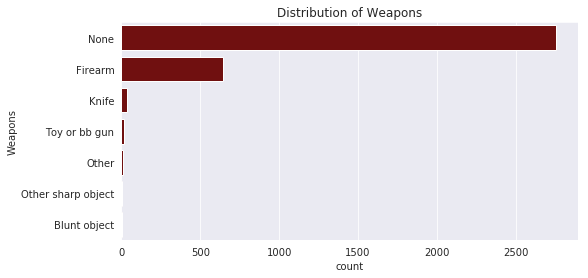

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(y="Weapons", data=datacat, color="maroon")
ax.set(title="Distribution of Weapons")
plt.show()

In [42]:
datacat = datacat.drop(['Weapon (Most Dangerous)'], axis=1)
data = data.drop(['Weapon (Most Dangerous)'], axis=1)

__*Secondary Weapon:*__
- Most of these prisoners did not use a weapon while committing their crimes
- Over 500 only used 1 weapon

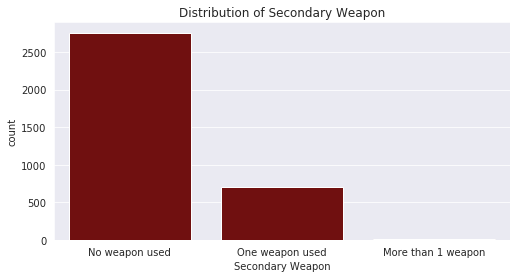

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Secondary Weapon", data=datacat, color="maroon")
ax.set(title="Distribution of Secondary Weapon")
plt.show()

__*Has at least one mental disorder:*__
- Most of these prisoners do not have a mental disorder (at least while taking this survey or prior to taking this survey)
- Around 600 prisoners do have at least one known mental disorder

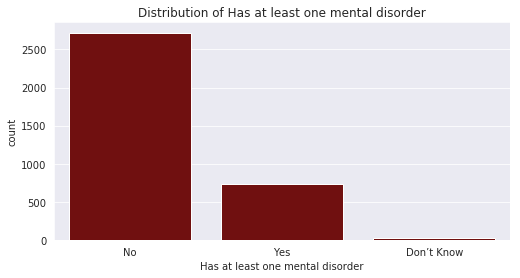

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Has at least one mental disorder", data=datacat, color="maroon")
ax.set(title="Distribution of Has at least one mental disorder")
plt.show()

__*Physically or Sexually Abused:*__
- Most of these prisoners do not have a history of abuse
- There are more prisoners that have been physically abused than sexually abused
- A number of prisoners have been abused both physically and sexually

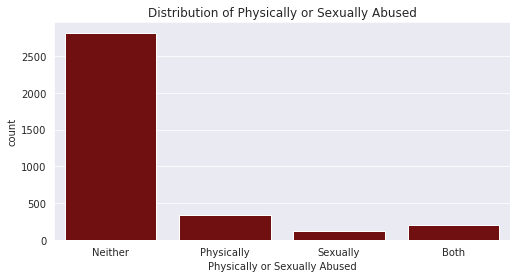

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Physically or Sexually Abused", data=datacat, color="maroon")
ax.set(title="Distribution of Physically or Sexually Abused")
plt.show()

__*Children:*__
- Most of these prisoners have children
- Over 2500 prisoners do have children
- Around 700 prisoners do not have children

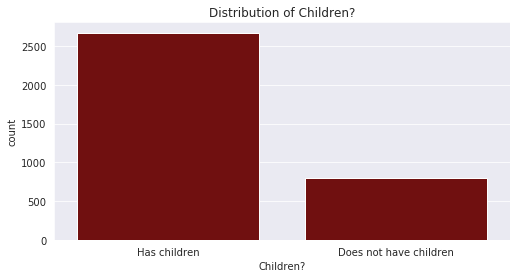

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Children?", data=datacat, color="maroon")
ax.set(title="Distribution of Children?")
plt.show()

__*Who did you live with growing up?:*__
- The largest number of prisoners lived with both parents growing up
- Closely following that is only growing up with a mother (just under 1250 prisoners)
- Third most common is living with grandparents, then father, then other relatives

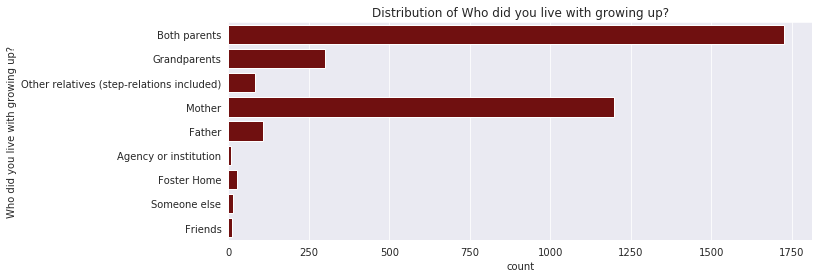

In [47]:
sns.set_style("darkgrid")
plt.figure(figsize=(23,4))
plt.subplot(1,2,1)
ax = sns.countplot(y="Who did you live with growing up?", data=datacat, color="maroon")
ax.set(title="Distribution of Who did you live with growing up?")
plt.show()

__*Mother been incarcerated?:*__
- Most prisoners mothers have not been incarcerated

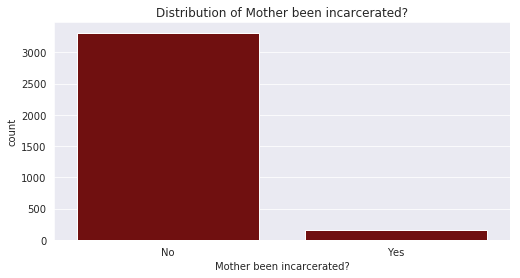

In [48]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Mother been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Mother been incarcerated?")
plt.show()

__*Father been incarcerated?:*__
- Most prisoners fathers have not been incarcerated
- In Comparison to mothers, there are more fathers who have been incarcerated

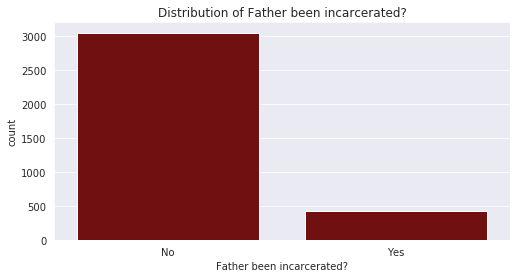

In [49]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Father been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Father been incarcerated?")
plt.show()

__*Spouse been incarcerated?:*__
- Most prisoners spouses have not been incarcerated

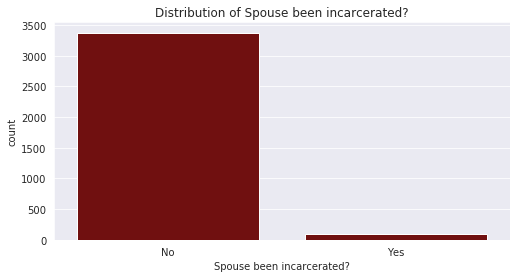

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Spouse been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Spouse been incarcerated?")
plt.show()

__*Child been incarcerated?:*__
- Most prisoners children have not been incarcerated

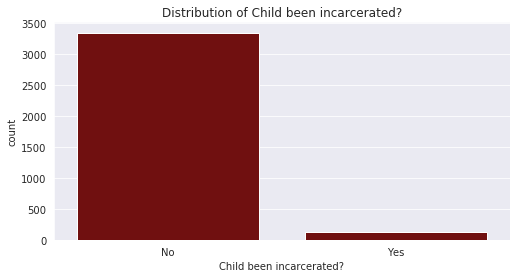

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Child been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Child been incarcerated?")
plt.show()

__*Brother been incarcerated?:*__
- Most prisoners brothers have not been incarcerated
- In comparison to all other relatives being incarcerated, brothers being incarcerated is the most common
- Unlike all the other relatives count of incarceration being under 500, brothers being incarcerated is just under 1000

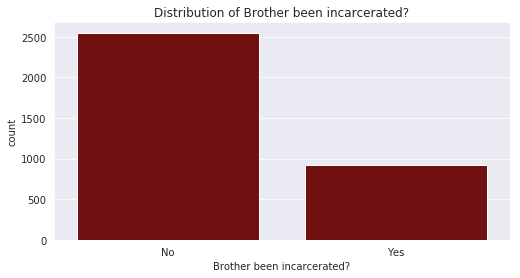

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Brother been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Brother been incarcerated?")
plt.show()

__*Sister been incarcerated?:*__
- Most prisoners sisters have not been incarcerated

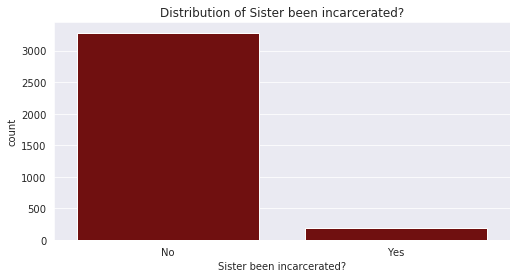

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Sister been incarcerated?", data=datacat, color="maroon")
ax.set(title="Distribution of Sister been incarcerated?")
plt.show()

__*Ever used any illegal drugs?:*__
- Most prisoners have used illegal drugs
- Over 2500 prisoners have used illegal drugs, while just under 1000 have not

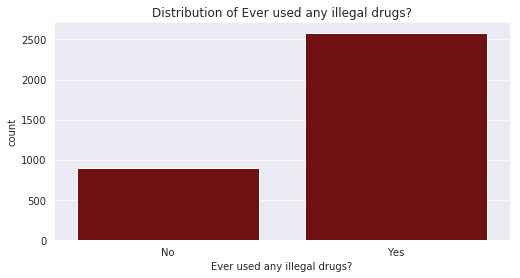

In [54]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Ever used any illegal drugs?", data=datacat, color="maroon")
ax.set(title="Distribution of Ever used any illegal drugs?")
plt.show()

__*Ever regularly drank alcohol?:*__
- In comparison to the other features, regularly drinking alcohol or not is one of the closer counts
- More prisoners have regularly drank alcohol than not
- There is not a great difference between prisoners regularly drinking alcohol (count of over 1750) and not regularly drinking alcohol (count of around 1600)

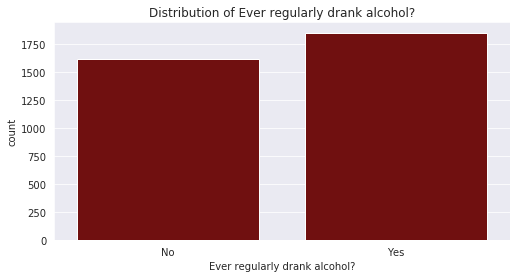

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Ever regularly drank alcohol?", data=datacat, color="maroon")
ax.set(title="Distribution of Ever regularly drank alcohol?")
plt.show()

__*EduLevel:*__
- The largest count of prisoners have an education level of some highschool (9th - 11th grade), count over 1200
- This is followed by graduated high school (count around 900)
- Third in count is some college (about 600)
- More prisoners have higher education than a lower education

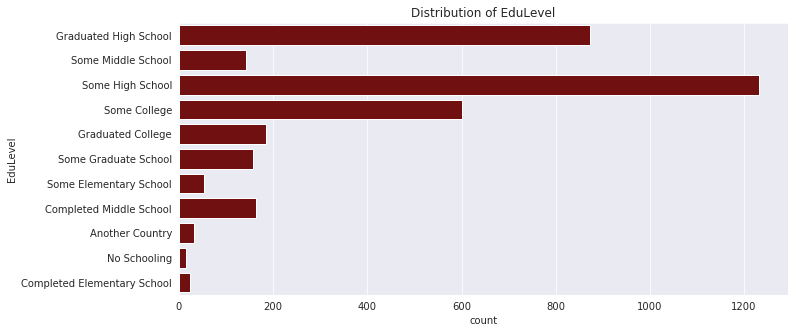

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
ax = sns.countplot(y="EduLevel", data=datacat, color="maroon")
ax.set(title="Distribution of EduLevel")
plt.show()

__*Income Range:*__ 
- The monthly income range among these prisoners varies greatly
- The largest count of monthly income is in the 1200-1499 range having a count of almost 500, followed by 1500-1999 range with a count over 400, and then 7500 or more with a count of about 400
- The lowest count of monthly income is no income, followed by the 1-199 range

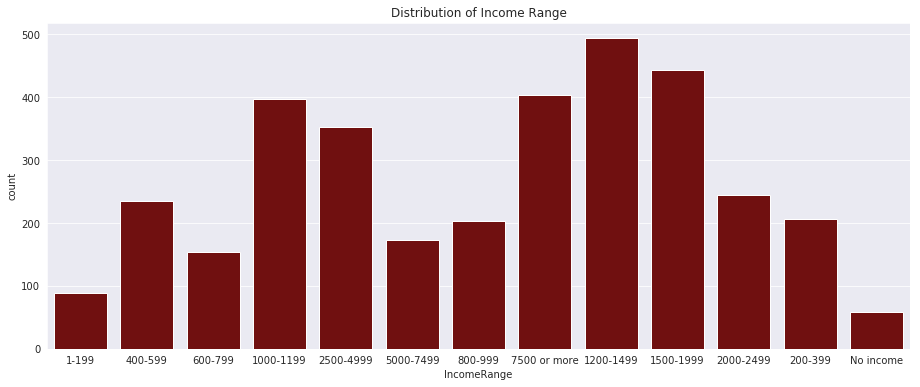

In [57]:
sns.set_style("darkgrid")
plt.figure(figsize=(34,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="IncomeRange", data=datacat, color="maroon")
ax.set(title="Distribution of Income Range")
plt.show()

## Rename Columns
- Renaming the columns will make them easier to work with going forward

In [58]:
datacat.rename(columns={'US Citizenship':'USCitizen', 'Marital Status':'MaritalStatus', 'Current Offense':'CurrentOffense',
       'Crime for drug money?':'CrimeDrugMoney', 'Sex offender':'SexOffender',
       'Status at arrest':'Status', 'Secondary Weapon':'SecondWeapon',
       'Has at least one mental disorder':'MentalDisorder','Physically or Sexually Abused':'Abused',
       'Children?':'Children', 'Who did you live with growing up?':'Guardian',
       'Mother been incarcerated?':'MotherPrison', 'Father been incarcerated?':'FatherPrison',
       'Spouse been incarcerated?':'SpousePrison', 'Child been incarcerated?':'ChildPrison',
       'Brother been incarcerated?':'BrotherPrison', 'Sister been incarcerated?':'SisterPrison',
       'Ever used any illegal drugs?':'IllegalDrugs','Ever regularly drank alcohol?':'AlcoholDaily',
       'EduLevel':'Education', 'IncomeRange':'Income'}, inplace=True)

In [59]:
target.rename(columns={'Criminal history':'CriminalHistory'}, inplace=True)

## __Encoding__

Create a binary column for each category

[Source](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)

__Categorical Dataset Encoding:__

In [60]:
data_cat_enc = pd.concat([datacat,pd.get_dummies(datacat['Sex'], prefix='Sex')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Race'], prefix='Race')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['USCitizen'], prefix='USCitizen')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['MaritalStatus'], prefix='MaritalStatus')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['CurrentOffense'], prefix='CurrentOffense')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['CrimeDrugMoney'], prefix='CrimeDrugMoney')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['SexOffender'], prefix='SexOffender')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Status'], prefix='Status')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['SecondWeapon'], prefix='SecondWeapon')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['MentalDisorder'], prefix='MentalDisorder')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Abused'], prefix='Abused')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Children'], prefix='Children')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Guardian'], prefix='Guardian')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['MotherPrison'], prefix='MotherPrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['FatherPrison'], prefix='FatherPrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['SpousePrison'], prefix='SpousePrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['ChildPrison'], prefix='ChildPrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['BrotherPrison'], prefix='BrotherPrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['SisterPrison'], prefix='SisterPrison')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['IllegalDrugs'], prefix='IllegalDrugs')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['AlcoholDaily'], prefix='AlcoholDaily')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Education'], prefix='Education')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Income'], prefix='Income')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(datacat['Weapons'], prefix='Weapons')],axis=1)
data_cat_enc.head(2)

,Sex,Race,USCitizen,MaritalStatus,CurrentOffense,CrimeDrugMoney,SexOffender,Status,SecondWeapon,MentalDisorder,...,Income_7500 or more,Income_800-999,Income_No income,Weapons_Blunt object,Weapons_Firearm,Weapons_Knife,Weapons_None,Weapons_Other,Weapons_Other sharp object,Weapons_Toy or bb gun
0,Female,Black non-Hispanic,Not a US Citizen,Married,Stolen Property,No,No,New Court Commitment,No weapon used,No,...,0,0,0,0,0,0,1,0,0,0
1,Female,Black non-Hispanic,Not a US Citizen,Seperated (not because of prison),Drug Trafficking,No,No,New Court Commitment,No weapon used,No,...,0,0,0,0,0,0,1,0,0,0


- Drop the columns that are not encoded

In [61]:
data_cat_enc.drop(['Sex'],axis=1, inplace=True)
data_cat_enc.drop(['Race'],axis=1, inplace=True)
data_cat_enc.drop(['USCitizen'],axis=1, inplace=True)
data_cat_enc.drop(['MaritalStatus'],axis=1, inplace=True)
data_cat_enc.drop(['CurrentOffense'],axis=1, inplace=True)
data_cat_enc.drop(['CrimeDrugMoney'],axis=1, inplace=True)
data_cat_enc.drop(['SexOffender'],axis=1, inplace=True)
data_cat_enc.drop(['Status'],axis=1, inplace=True)
data_cat_enc.drop(['SecondWeapon'],axis=1, inplace=True)
data_cat_enc.drop(['MentalDisorder'],axis=1, inplace=True)
data_cat_enc.drop(['Abused'],axis=1, inplace=True)
data_cat_enc.drop(['Children'],axis=1, inplace=True)
data_cat_enc.drop(['Guardian'],axis=1, inplace=True)
data_cat_enc.drop(['MotherPrison'],axis=1, inplace=True)
data_cat_enc.drop(['FatherPrison'],axis=1, inplace=True)
data_cat_enc.drop(['SpousePrison'],axis=1, inplace=True)
data_cat_enc.drop(['ChildPrison'],axis=1, inplace=True)
data_cat_enc.drop(['BrotherPrison'],axis=1, inplace=True)
data_cat_enc.drop(['SisterPrison'],axis=1, inplace=True)
data_cat_enc.drop(['IllegalDrugs'],axis=1, inplace=True)
data_cat_enc.drop(['AlcoholDaily'],axis=1, inplace=True)
data_cat_enc.drop(['Education'],axis=1, inplace=True)
data_cat_enc.drop(['Income'],axis=1, inplace=True)
data_cat_enc.drop(['Weapons'],axis=1, inplace=True)
data_cat_enc.head(2)

,Sex_Female,Sex_Male,"Race_American Indian, Alaska Native non-Hispanic","Race_Asian, Pacific Islander, Native Hawaiian non-Hispanic",Race_Black non-Hispanic,Race_Hispanic,"Race_Multiple races, non-Hispanic",Race_White non-Hispanic,USCitizen_Not a US Citizen,USCitizen_US Citizen,...,Income_7500 or more,Income_800-999,Income_No income,Weapons_Blunt object,Weapons_Firearm,Weapons_Knife,Weapons_None,Weapons_Other,Weapons_Other sharp object,Weapons_Toy or bb gun
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


_Target Value Encoding:__

In [62]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
target['CriminalHistoryEnc'] = le.fit_transform(target['CriminalHistory'])
target.drop(['CriminalHistory'],axis=1, inplace=True)
target.head(3)

,CriminalHistoryEnc
0,0
1,0
2,0


## Correlation 

- A correlation matrix visualizes the correlation between certain variables.
- As seen below, since there is only continuous feature, there are no other varibales to compare correlation to and is not necessary

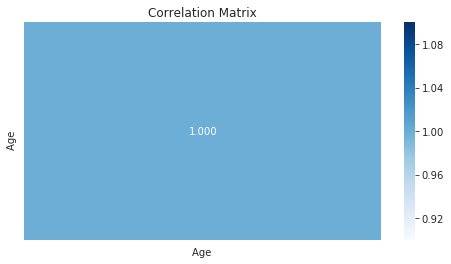

In [63]:
corr = datacont.corr()
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

## Save Final Dataframes as CSVs

In [64]:
datacont.to_csv('../BUAN6590-Capstone-BridgetWeill/datacont.csv', index=0)

In [65]:
target.to_csv('../BUAN6590-Capstone-BridgetWeill/target.csv', index=0)

In [66]:
data_cat_enc.to_csv('../BUAN6590-Capstone-BridgetWeill/data_cat_enc.csv', index=0)